In [22]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# load the Johns Hopkins AP dataset
raw_jhap_df = pd.read_csv('data/JH_AP_COVID-19_timeseries.csv')

In [24]:
# View the raw data in a dataframe
raw_jhap_df.head()

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_rolling_7_day_avg,new_deaths_rolling_7_day_avg
0,84001001,county,1001.0,Autauga,Alabama,01/22/2020,55200.0,0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,84001001,county,1001.0,Autauga,Alabama,01/23/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,84001001,county,1001.0,Autauga,Alabama,01/24/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,84001001,county,1001.0,Autauga,Alabama,01/25/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,84001001,county,1001.0,Autauga,Alabama,01/26/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [25]:
# Remove NaN values from the dataframe
jhap_df = raw_jhap_df.fillna(0)

jhap_df.head()

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_rolling_7_day_avg,new_deaths_rolling_7_day_avg
0,84001001,county,1001.0,Autauga,Alabama,01/22/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,84001001,county,1001.0,Autauga,Alabama,01/23/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,84001001,county,1001.0,Autauga,Alabama,01/24/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84001001,county,1001.0,Autauga,Alabama,01/25/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84001001,county,1001.0,Autauga,Alabama,01/26/2020,55200.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Create dataframe with only North Carolina data
nc_df = jhap_df.loc[jhap_df['state'] == 'North Carolina']

nc_df.head()

,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_rolling_7_day_avg,new_deaths_rolling_7_day_avg
218776,84037001,county,37001.0,Alamance,North Carolina,01/22/2020,160576.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218777,84037001,county,37001.0,Alamance,North Carolina,01/23/2020,160576.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218778,84037001,county,37001.0,Alamance,North Carolina,01/24/2020,160576.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218779,84037001,county,37001.0,Alamance,North Carolina,01/25/2020,160576.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218780,84037001,county,37001.0,Alamance,North Carolina,01/26/2020,160576.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Disable warning for this block
import warnings
warnings.filterwarnings("ignore")

# Create dataframe with only Wake County, NC data
wake_co_df = nc_df.loc[nc_df['location_type'] == 'county'][nc_df['location_name'] == 'Wake']

# Reset the index on the new dataframe
wake_co_df = wake_co_df.reset_index()

wake_co_df


,index,uid,location_type,fips_code,location_name,state,date,total_population,cumulative_cases,cumulative_cases_per_100_000,cumulative_deaths,cumulative_deaths_per_100_000,new_cases,new_deaths,new_cases_per_100_000,new_deaths_per_100_000,new_cases_rolling_7_day_avg,new_deaths_rolling_7_day_avg
0,229332,84037183,county,37183.0,Wake,North Carolina,01/22/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
1,229333,84037183,county,37183.0,Wake,North Carolina,01/23/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
2,229334,84037183,county,37183.0,Wake,North Carolina,01/24/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
3,229335,84037183,county,37183.0,Wake,North Carolina,01/25/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
4,229336,84037183,county,37183.0,Wake,North Carolina,01/26/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
5,229337,84037183,county,37183.0,Wake,North Carolina,01/27/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
6,229338,84037183,county,37183.0,Wake,North Carolina,01/28/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
7,229339,84037183,county,37183.0,Wake,North Carolina,01/29/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
8,229340,84037183,county,37183.0,Wake,North Carolina,01/30/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000
9,229341,84037183,county,37183.0,Wake,North Carolina,01/31/2020,1046558.0,0,0.00,0,0.00,0.0,0.0,0.00,0.00,0.000000,0.000000


Text(0, 0.5, 'New Cases per day')

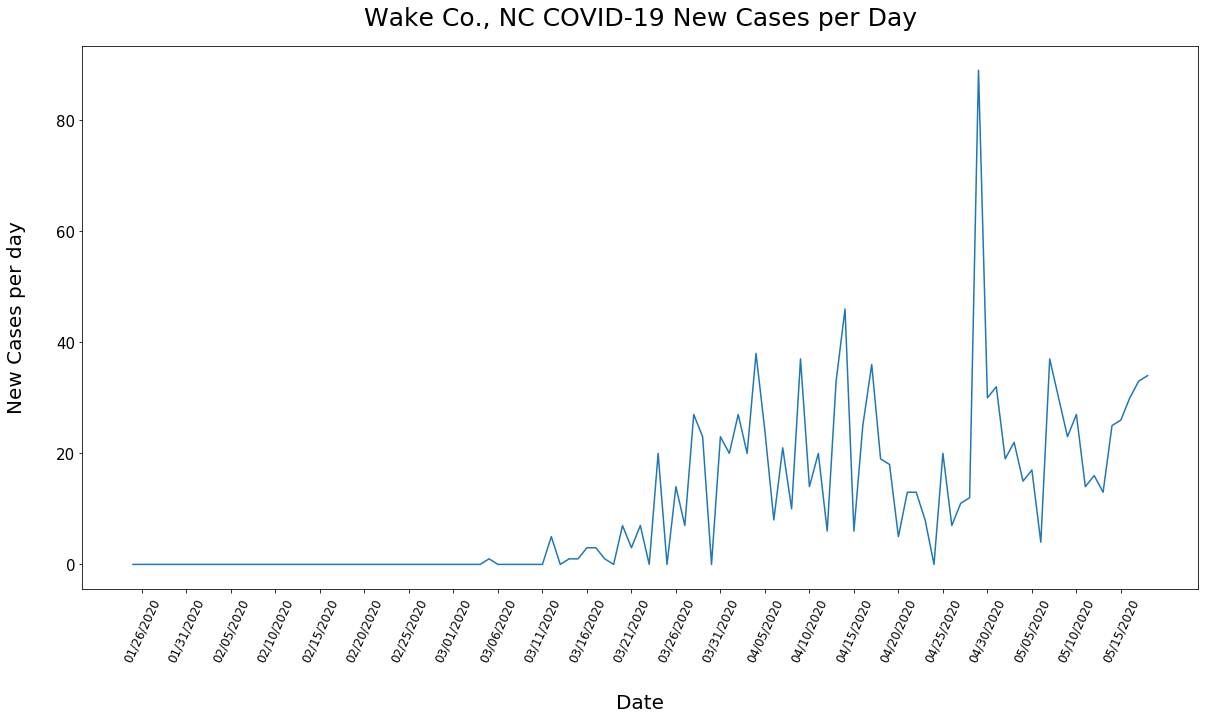

In [178]:
# Make a simple timeseries plot of Wake County New Cases by day
plt.figure(figsize = (20,10))

# Rotate the x ticks
plt.xticks(rotation=65, fontsize=12)

plt.yticks(fontsize=15)

plt.title('Wake Co., NC COVID-19 New Cases per Day', fontsize=25, pad = 20)

ax = plt.gca()

max_value = len(wake_co_df['date'])
min_value = 1
number_of_steps = 5
l = np.arange(min_value, max_value, number_of_steps)


x_tick_dates = []
loop_count = 0
for date in wake_co_df['date']:
    loop_count += 1
    if loop_count % 5 == 0:
        x_tick_dates.append(date)


ax.set(xticks=l, xticklabels= x_tick_dates)



wake_co_new_cases = plt.plot(wake_co_df['date'][1:], wake_co_df['new_cases'][1:])

# Set the x & y axis lables
plt.xlabel('Date', fontsize=20, labelpad=30)
plt.ylabel('New Cases per day', fontsize=20, labelpad=30)






Text(0, 0.5, 'Deaths per day')

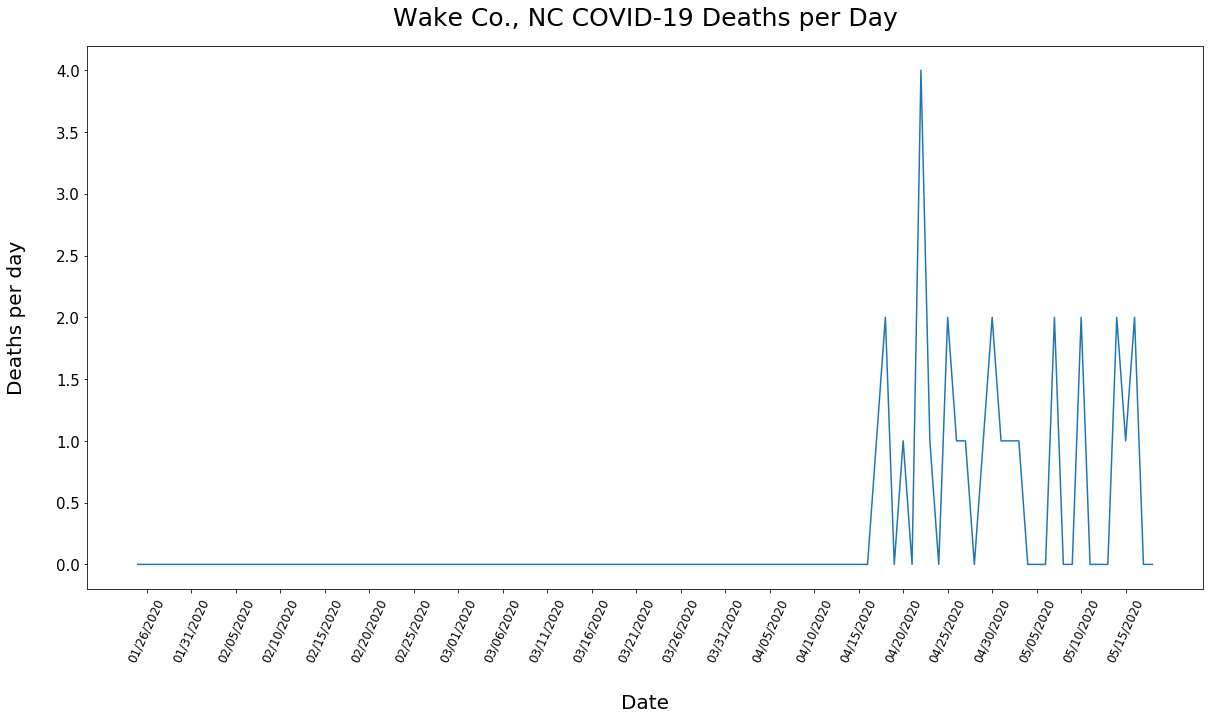

In [177]:
# Make a simple timeseries plot of Wake County New Cases by day
plt.figure(figsize = (20,10))

# Rotate the x ticks
plt.xticks(rotation=65, fontsize=12)

plt.yticks(fontsize=15)

plt.title('Wake Co., NC COVID-19 Deaths per Day', fontsize=25, pad = 20)

ax = plt.gca()

max_value = len(wake_co_df['date'])
min_value = 1
number_of_steps = 5
l = np.arange(min_value, max_value, number_of_steps)


x_tick_dates = []
loop_count = 0
for date in wake_co_df['date']:
    loop_count += 1
    if loop_count % 5 == 0:
        x_tick_dates.append(date)


ax.set(xticks=l, xticklabels= x_tick_dates)



wake_co_new_cases = plt.plot(wake_co_df['date'][1:], wake_co_df['new_deaths'][1:])

# Set the x & y axis lables
plt.xlabel('Date', fontsize=20, labelpad=30)
plt.ylabel('Deaths per day', fontsize=20, labelpad=30)




